In [100]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
from langchain.document_loaders import DataFrameLoader

# using tokentextsplitter to better maintain the meaning and context of information

### Dependencies

langchain, tiktoken, pandas, chromadb

tiktoken - for running some of langchain.text_splitters

langchain - library useful for creating embeddings, tokenization, indexing, connecting to vectordbs and other nlp stuff

chromadb - vector database for embeddings

pandas - useful data scientific library for manipulating tabular data (using dataframes)

In [101]:
# THIS COULD BE CHANGED TO IMPORTING VIA LINK

df = pd.read_csv("./medium.csv")

In [102]:
loader = DataFrameLoader(df, page_content_column="Text")
docs = loader.load()
print(docs[0])

page_content='1. Introduction of Word2vec\n\nWord2vec is one of the most popular technique to learn word embeddings using a two-layer neural network. Its input is a text corpus and its output is a set of vectors. Word embedding via word2vec can make natural language computer-readable, then further implementation of mathematical operations on words can be used to detect their similarities. A well-trained set of word vectors will place similar words close to each other in that space. For instance, the words women, men, and human might cluster in one corner, while yellow, red and blue cluster together in another.\n\nThere are two main training algorithms for word2vec, one is the continuous bag of words(CBOW), another is called skip-gram. The major difference between these two methods is that CBOW is using context to predict a target word while skip-gram is using a word to predict a target context. Generally, the skip-gram method can have a better performance compared with CBOW method, for

In [103]:
# Average article text length
article_characters_count = 0
for doc in docs:
	article_characters_count += len(doc.page_content)

average_article_character_quantity = article_characters_count / len(docs)

average_article_character_quantity

5566.378864126527

In [116]:
df['word_count'] = df['Text'].apply(lambda x: len(x.split()))

mean_word_count = df['word_count'].mean()
median_word_count = df['word_count'].median()
print('mean word count', mean_word_count)
print('median word count', median_word_count)

mean word count 901.5384615384615
median word count 516.0


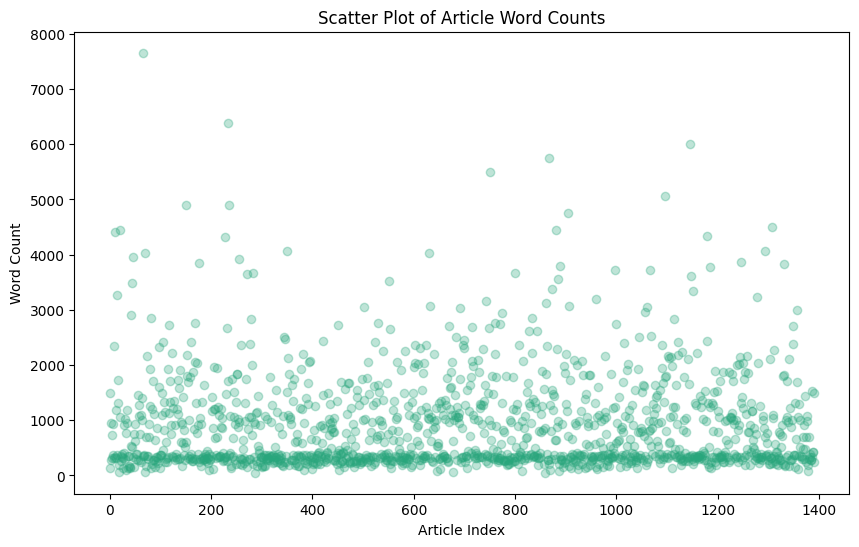

In [105]:
# Visualizing for better intuition for proper chunk_size
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['word_count'], alpha=0.3, color='#28a67c')
plt.title('Scatter Plot of Article Word Counts')
plt.xlabel('Article Index')
plt.ylabel('Word Count')
plt.show()

In [113]:
from langchain.text_splitter import TokenTextSplitter

chunk_size = int(mean_word_count / 4)
overlap_percent = 0.1
chunk_overlap = int(chunk_size * overlap_percent)
text_splitter = TokenTextSplitter(
	chunk_size=chunk_size, chunk_overlap=chunk_overlap
)

print('chunk size', chunk_size, '\nchunk overlap', chunk_overlap)

docs_splitted = text_splitter.split_documents(docs)
print('docs length', len(docs),'\nsplitted docs length', len(docs_splitted))

chunk size 225 
chunk overlap 22
docs length 1391 
splitted docs length 9490


In [ ]:
docs_splitted

[Document(page_content='1. Introduction of Word2vec\n\nWord2vec is one of the most popular technique to learn word embeddings using a two-layer neural network. Its input is a text corpus and its output is a set of vectors. Word embedding via word2vec can make natural language computer-readable, then further implementation of mathematical operations on words can be used to detect their similarities. A well-trained set of word vectors will place similar words close to each other in that space. For instance, the words women, men, and human might cluster in one corner, while yellow, red and blue cluster together in another.\n\nThere are two main training algorithms for word2vec, one is the continuous bag of words(CBOW', metadata={'Title': 'A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model'}),
 Document(page_content=' one is the continuous bag of words(CBOW), another is called skip-gram. The major difference between these two methods is that CBOW is using context to predict a 